# Classification

The need to group data arises naturally in many scenario. For example, a marketing officer would need to identify which group of customers are the most worthwhile to target, and a researcher might want to categorize households based on their sociodemographic background. 

Techniques used in grouping data are separated into two broad categories:
- **Classification** - Group data based on examples you provide.
- **Clustering** - Group data without any examples. 

The former is a form of *supervised learning*, while the latter is *unsupervised learning*. Which type of techniques to use depends on your need. In the case of marketing, perhaps you already have experience on which type of customers is the most profitable, so you will go for classification. On the other hand, when it comes to categorizing households, you might want the program to automatically separate the households into groups, which would be clustering.


## A. Classification
Suppose you have the following data:

| Customer |   Address   | Spending |
|:--------:|:-----------:|:--------:|
|     1    |   Central   |   High   |
|     2    |  Admiralty  |   High   |
|     3    | North Point |    Low   |
|     4    |    Shatin   |   High   |
|     5    |    Fo Tan   |    Low   |
|     6    |  Ma On Shan |    Low   |

And you need to predict the spending of the following customer:

| Customer |   Address   | Spending |
|:--------:|:-----------:|:--------:|
|     7    |   Chai Wan  |     ?    |

How should you do so? 

Before we proceed further, let us first go over the terminology commonly used in classification. In economics we usually call each data point an *observation*, with "Spending" being a *dependent variable* and "Address" an *independent variable*. In classification it is more common to call each data point a *sample*, with "Spending" being a *class variable* and "Address" a *feature*.

In [18]:
import pandas as pd

#Data
raw_data = [
            [1,1,'Central',22.2819,114.1581,1],
            [2,1,'Admiralty',22.2796,114.1655,1],
            [3,0,'North Point',22.2871,114.1917,1],
            [4,1,'Shatin',22.3771,114.1974,0],
            [5,0,'Fo Tan',22.3969,114.1959,0],
            [6,0,'Ma On Shan',22.4221,114.2324,0],
            ]
labels = ['customer','hi_spending','address','latitude','longitude','hk_island']
data = pd.DataFrame.from_records(raw_data,columns=labels)

In [19]:
#Check data
data

,customer,hi_spending,address,latitude,longitude,hk_island
0,1,1,Central,22.2819,114.1581,1
1,2,1,Admiralty,22.2796,114.1655,1
2,3,0,North Point,22.2871,114.1917,1
3,4,1,Shatin,22.3771,114.1974,0
4,5,0,Fo Tan,22.3969,114.1959,0
5,6,0,Ma On Shan,22.4221,114.2324,0


We can also visual the data on a map of Hong Kong:

<img src="http://www.ticoneva.com/econ/econ4130/images/8-map.png" width="300">

This map is generated with the ```basemap``` library. You can find the corresponding script below.

### Ordinary Least Square
There are multiple ways to approach this problem. As an economics major, the first technique that comes to mind is probably the ordinary least square (OLS). Why is OLS not suitable for classification?

It is unsuitable because OLS gives continuous predictions. If ```1``` is high income and ```0``` is low income, should we interpret a prediction of  ```2``` as *really high income*? Worse, how should we interpret a negative prediction?

### Logit

A seasoned economist will likely use a logit regression to handle this task. Logistic regression assumes that 
$$
P(y=1\mid \vec{x}) = \frac{e^{\vec{x}\vec{\beta}}}{1+e^{\vec{x}\vec{\beta}}}
$$


First let us consider the district of each customer's address:

| Customer |   Address   | Hong Kong Island | High Spending |
|:--------:|:-----------:|:----------------:|:-------------:|
|     1    |   Central   |         1        |       1       |
|     2    |  Admiralty  |         1        |       1       |
|     3    | North Point |         1        |       0       |
|     4    |    Shatin   |         0        |       1       |
|     5    |    Fo Tan   |         0        |       0       |
|     6    |  Ma On Shan |         0        |       0       |
|     7    |   Chai Wan  |         1        |       ?       |

In [20]:
#Training data
y = data["hi_spending"]
X = data["hk_island"].values.reshape(-1, 1)

#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
print("Prediction (high spending = 1):".ljust(35),model.predict([[1]]))
print("Pr(Low) Pr(High):".ljust(35),model.predict_proba([[1]]))

Prediction (high spending = 1):     [1]
Pr(Low) Pr(High):                   [[ 0.44274263  0.55725737]]


One question we might have from the above is, why is estimated probabilities not 1/3 and 2/3? This is because in data mining, constraints are added to to penalize extreme estimates. This technique is called *regularization*. Regularization is done to prevent overfitting, the phenomenon of closely fitting existing data but producing good predictions for unseen samples.

If we tune down the regularization parameter in the logistic regression, we will get predictions closer to (1/3,2/3):

In [21]:
#Logistic regression with weak regularization (high C)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=50)
model.fit(X,y)
print("Prediction (high spending = 1):".ljust(35),model.predict([[1]]))
print("Pr(Low) Pr(High):".ljust(35),model.predict_proba([[1]]))

Prediction (high spending = 1):     [1]
Pr(Low) Pr(High):                   [[ 0.34193709  0.65806291]]


The above example is in effect already categorized. What if we have latitudinal and longitudinal data instead?

| Customer |   Address   | Latitude | Longitude | High Spending |
|:--------:|:-----------:|:--------:|:---------:|:-------------:|
|     1    |   Central   |  22.2819 |  114.1581 |       1       |
|     2    |  Admiralty  |  22.2796 |  114.1655 |       1       |
|     3    | North Point |  22.2871 |  114.1917 |       0       |
|     4    |    Shatin   |  22.3771 |  114.1974 |       1       |
|     5    |    Fo Tan   |  22.3969 |  114.1959 |       0       |
|     6    |  Ma On Shan |  22.4221 |  114.2324 |       0       |
|     7    |   Chai Wan  |   22.27  |   114.24  |       ?       |

In [22]:
#Training data
y = data["hi_spending"]
X2 = data[["latitude","longitude"]]

#Test data
X_ChaiWan = [[22.27,114.24]]
X_Shatin = [X2.iloc[3].values]
X_NorthPoint = [X2.iloc[2].values]
X_Fotan = [X2.iloc[4].values]

#Logistic regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X2,y)

tw = 50 #title column width
print("Model Accuracy:".ljust(tw),logit.score(X2,y))
print("Chai Wan Prediction (high spending = 1):".ljust(tw),logit.predict(X_ChaiWan))
print("Chai Wan Est. Prob - Pr(Low) Pr(High):".ljust(tw),logit.predict_proba(X_ChaiWan))
print("Shatin Prediction (high spending = 1):".ljust(tw),logit.predict(X_Shatin))
print("Shatin Est. Prob. - Pr(Low) Pr(High):".ljust(tw),logit.predict_proba(X_Shatin))
print("North Point Prediction (high spending = 1):".ljust(tw),logit.predict(X_NorthPoint))
print("North Point Est. Prob. - Pr(Low) Pr(High):".ljust(tw),logit.predict_proba(X_NorthPoint))
print("Fo Tan Prediction (high spending = 1):".ljust(tw),logit.predict(X_Fotan))
print("Fo Tan Est. Prob. - Pr(Low) Pr(High):".ljust(tw),logit.predict_proba(X_Fotan))


Model Accuracy:                                    0.666666666667
Chai Wan Prediction (high spending = 1):           [1]
Chai Wan Est. Prob - Pr(Low) Pr(High):             [[ 0.49866256  0.50133744]]
Shatin Prediction (high spending = 1):             [0]
Shatin Est. Prob. - Pr(Low) Pr(High):              [[ 0.50071205  0.49928795]]
North Point Prediction (high spending = 1):        [1]
North Point Est. Prob. - Pr(Low) Pr(High):         [[ 0.49913386  0.50086614]]
Fo Tan Prediction (high spending = 1):             [0]
Fo Tan Est. Prob. - Pr(Low) Pr(High):              [[ 0.50106881  0.49893119]]


Since we are going run the same tests for all the models in this notebook, it would be helpful to write a function for that so we will not need to type the same code repeatedly:

In [23]:
#Helper function to evaluate model accuracy and generate some predictions
def summarize(model,data):
    #Data for calculating r-squared
    y = data["hi_spending"]
    X = data[["latitude","longitude"]]    
    
    #Test data
    X_ChaiWan = [[22.27,114.24]]
    X_Shatin = [[22.3771,114.1974]]
    X_NorthPoint = [[22.2871,114.1917]]
    X_Fotan = [[22.3969,114.1959]]    
    
    tw = 50 #title column width
    print("Model Accuracy:".ljust(tw),model.score(X,y))
    print("Chai Wan Prediction (high spending = 1):".ljust(tw),model.predict(X_ChaiWan)[0])
    print("Chai Wan Est. Prob - Pr(Low) Pr(High):".ljust(tw),model.predict_proba(X_ChaiWan)[0])
    print("North Point Prediction (high spending = 1):".ljust(tw),model.predict(X_NorthPoint)[0])
    print("North Point Est. Prob. - Pr(Low) Pr(High):".ljust(tw),model.predict_proba(X_NorthPoint)[0])    
    print("Shatin Prediction (high spending = 1):".ljust(tw),model.predict(X_Shatin)[0])
    print("Shatin Est. Prob. - Pr(Low) Pr(High):".ljust(tw),model.predict_proba(X_Shatin)[0])
    print("Fo Tan Prediction (high spending = 1):".ljust(tw),model.predict(X_Fotan)[0])
    print("Fo Tan Est. Prob. - Pr(Low) Pr(High):".ljust(tw),model.predict_proba(X_Fotan)[0])

We will also write a function to highlight the decision boundaries with different colors. This function uses the ```basemap``` library, which you can install with ```conda install -c conda-forge basemap```. The function is a bit complicated, so it is okay if you do not understand how it works right now.

In [24]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import matplotlib.pyplot as plt
import os
if "PROJ_LIB" not in os.environ:
    os.environ["PROJ_LIB"] = "/opt/conda/share/proj/"
from mpl_toolkits.basemap import Basemap
import numpy as np

def drawBoundaryOnMap(model,data):
    
    #Fetch latitudinal and longtitudinal data
    lat = data['latitude'].values
    lon = data['longitude'].values

    #Map size
    padding = 0.15 # padding
    lat_min = min(lat) - padding
    lat_max = max(lat) + padding
    lon_min = min(lon) - padding
    lon_max = max(lon) + padding

    #6x6 matplotlib figure
    plt.figure(figsize=(6,6))

    #Create map using Basemap
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max-lon_min)/2,
                resolution = 'h',
                )
    m.drawcoastlines()
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color = 'white',lake_color='#46bcec')

    #Heatmap highlighting decision boundaries
    xy = np.mgrid[lat_min:lat_max:0.001,lon_min:lon_max:0.001]
    x_count = xy.shape[1]
    y_count = xy.shape[2]
    xy = xy.reshape(2,-1).T
    a = model.predict(xy)
    #a = model.predict_proba(xy)[:,1]
    a = np.asarray(a).reshape((x_count,y_count))
    m.imshow(a, cmap='PiYG', interpolation='nearest', 
               extent=(lon_min,lon_max,lat_min,lat_max),
               alpha=0.8,zorder=5)
    m.scatter(lon, lat, marker = 'o', color='r', zorder=6)
    plt.show()

Let's try out the graphing function on the logit model:

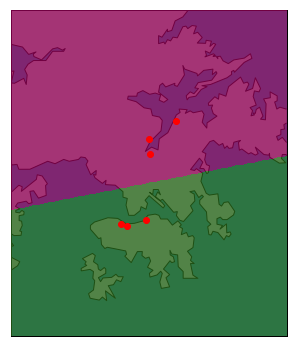

In [25]:
drawBoundaryOnMap(logit,data)

Our logit model will label anything within the purple area as low income and that within the green area as high income. 

### Bayes Rule
The Bayes Rule says that

$$
P(y \mid \vec{x}) = \frac{P(\vec{x} \mid y)P(y)}{P(\vec{x})}
$$
Applying to our current problem,

$$
P(spending \mid location) = \frac{P(location \mid spending)P(spending)}{P(location)}
$$
Our task is to pick a value for $spending$ that maximizes this probability:

$$
\hat{spending} = \underset{spending}{\operatorname{argmax}}  \left \{ \frac{P(location \mid spending)P(spending)}{P(location)} \right \}
$$

Notice that $P(location)$ is constant for any given location, so we can eliminate it and get

$$
\hat{spending} = \underset{spending}{\operatorname{argmax}}  \left \{ P(location \mid spending)P(spending) \right \}
$$

To solve this maximization problem we need $P(location \mid spending)$, and there are two common ways to get that.

#### i. Native Bayes
Native Bayes assumes that all the elements of $\vec{x}$ are independent, so

$$
P(y \mid \vec{x}) = P(y \mid x_1) \cdot P(y \mid x_2) \cdot P(y \mid x_3) ... 
$$

Each $P(y \mid x_i)$ is assumed to be normally distributed. The mean and standard deviations are estimated by the process.

Model Accuracy:                                    0.666666666667
Chai Wan Prediction (high spending = 1):           0
Chai Wan Est. Prob - Pr(Low) Pr(High):             [ 0.99011186  0.00988814]
North Point Prediction (high spending = 1):        1
North Point Est. Prob. - Pr(Low) Pr(High):         [ 0.28730036  0.71269964]
Shatin Prediction (high spending = 1):             0
Shatin Est. Prob. - Pr(Low) Pr(High):              [ 0.81835743  0.18164257]
Fo Tan Prediction (high spending = 1):             0
Fo Tan Est. Prob. - Pr(Low) Pr(High):              [ 0.87516804  0.12483196]


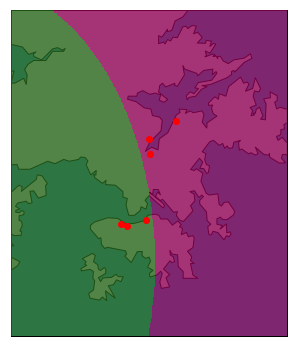

In [26]:
#Gaussian Native Bayes
from sklearn.naive_bayes import *
gnb = GaussianNB()
gnb.fit(X2,y)

summarize(gnb,data)
drawBoundaryOnMap(gnb,data)

#### ii. Linear Discriminant Analysis (LDA)
LDA assumes that the features are correlated.

Model Accuracy:                                    0.666666666667
Chai Wan Prediction (high spending = 1):           0
Chai Wan Est. Prob - Pr(Low) Pr(High):             [  9.99130115e-01   8.69885426e-04]
North Point Prediction (high spending = 1):        0
North Point Est. Prob. - Pr(Low) Pr(High):         [ 0.76209841  0.23790159]
Shatin Prediction (high spending = 1):             0
Shatin Est. Prob. - Pr(Low) Pr(High):              [ 0.54134531  0.45865469]
Fo Tan Prediction (high spending = 1):             1
Fo Tan Est. Prob. - Pr(Low) Pr(High):              [ 0.40821404  0.59178596]


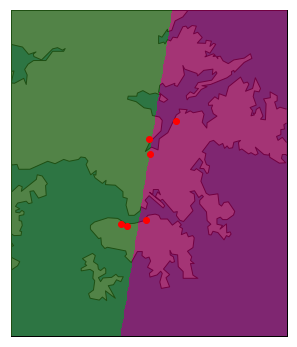

In [27]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X2,y)

summarize(lda,data)
drawBoundaryOnMap(lda,data)

### Support Vector Machine (SVD)

SVD looks for a boundary that separate two classes while allowing for a buffer zone where mistakes are tolerated.
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_001.png">
Source: <a href="http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html">scikit learn</a>

Model Accuracy:                                    0.666666666667
Chai Wan Prediction (high spending = 1):           1
Chai Wan Est. Prob - Pr(Low) Pr(High):             [ 0.5  0.5]
North Point Prediction (high spending = 1):        1
North Point Est. Prob. - Pr(Low) Pr(High):         [ 0.5  0.5]
Shatin Prediction (high spending = 1):             0
Shatin Est. Prob. - Pr(Low) Pr(High):              [ 0.5  0.5]
Fo Tan Prediction (high spending = 1):             0
Fo Tan Est. Prob. - Pr(Low) Pr(High):              [ 0.5  0.5]


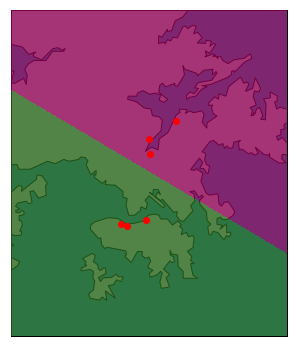

In [28]:
#Support Vector Machine Classifier
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X2,y)

summarize(svc,data)
drawBoundaryOnMap(svc,data)

### Nearest Neighbor
Another method we could use is to look at samples that have similar characters as the one we are trying to predict. This method is called *nearest neighbor*.

In the simpliest case, we will use the closest sample as a predictor:

Model Accuracy:                                    1.0
Chai Wan Prediction (high spending = 1):           0
Chai Wan Est. Prob - Pr(Low) Pr(High):             [ 1.  0.]
North Point Prediction (high spending = 1):        0
North Point Est. Prob. - Pr(Low) Pr(High):         [ 1.  0.]
Shatin Prediction (high spending = 1):             1
Shatin Est. Prob. - Pr(Low) Pr(High):              [ 0.  1.]
Fo Tan Prediction (high spending = 1):             0
Fo Tan Est. Prob. - Pr(Low) Pr(High):              [ 1.  0.]


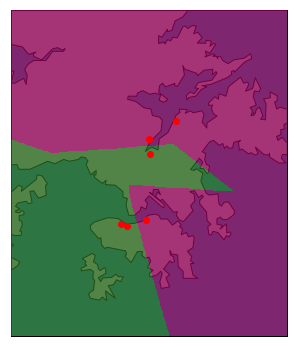

In [29]:
#Nearest Neigbhor
from sklearn.neighbors import KNeighborsClassifier

#Only consider the nearest neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X2,y)

summarize(knn,data)
drawBoundaryOnMap(knn,data)

Unlike previous methods, when we try to predict the outcome of a pre-existing sample such as Shatin, we will get the correct answer. Naturally, this is because a pre-existing sample's closest neighbor is itself.

Note that the number of neighbors is crucial. For example, suppose we use the three closest neighbors instead:

In [30]:
#Consider the three closest neighbor
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X2,y)
print("Model Accuracy:".ljust(tw),model.score(X2,y))
print("Chai Wan Prediction (high spending = 1):".ljust(tw),model.predict(X_ChaiWan))

print("Chai Wan Est. Prob - Pr(Low) Pr(High):".ljust(tw),model.predict_proba(X_ChaiWan))

Model Accuracy:                                    0.666666666667
Chai Wan Prediction (high spending = 1):           [1]
Chai Wan Est. Prob - Pr(Low) Pr(High):             [[ 0.33333333  0.66666667]]


The model estimates that Chai Wan has 1/3 chance of being low income and 2/3 chance of being high income because out of the three Hong Kong Island districts in our training data, one has low income (North Point) and two have high income (Central and Admiralty).

The following diagram sums up the estimates. The green circle indicates Chai Wan's closest neighbor, while the purple circle indicates the closest three neighbors.

<img src="http://www.ticoneva.com/econ/econ4130/images/8-map-knn.png" width="300">

### Classification Tree
Classification Tree repeatedly look for cutoffs that give the best prediction at each stage.

Model Accuracy:                                    1.0
Chai Wan Prediction (high spending = 1):           1
Chai Wan Est. Prob - Pr(Low) Pr(High):             [ 0.  1.]
North Point Prediction (high spending = 1):        0
North Point Est. Prob. - Pr(Low) Pr(High):         [ 1.  0.]
Shatin Prediction (high spending = 1):             1
Shatin Est. Prob. - Pr(Low) Pr(High):              [ 0.  1.]
Fo Tan Prediction (high spending = 1):             0
Fo Tan Est. Prob. - Pr(Low) Pr(High):              [ 1.  0.]


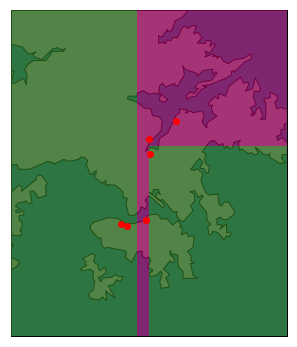

In [34]:
#Classification Tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X2,y)

summarize(dt,data)
drawBoundaryOnMap(dt,data)

#Export tree structure to PNG format
from sklearn.externals.six import StringIO  
import pydot
dotfile = StringIO()
tree.export_graphviz(dt, out_file=dotfile)
pydot.graph_from_dot_data(dotfile.getvalue())[0].write_png("tree.png")

The script above export the tree structure in an image filed named ```tree.png```. You might get a different try structure each time you run the script. Here is one example:

<img src="http://www.ticoneva.com/econ/econ4130/images/8-tree.png" width="300">

We can trace the cutoffs on a map to see how the tree works:

In [ ]:
lat = data['latitude'].values
lon = data['longitude'].values

#Map size
padding = 0.15 # padding
lat_min = min(lat) - padding
lat_max = max(lat) + padding
lon_min = min(lon) - padding
lon_max = max(lon) + padding

#Create map using Basemap
plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            resolution = 'h',
            )
m.drawcoastlines()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')

# plot points and cutoffs
m.scatter(lon, lat, marker = 'o', color='r', zorder=5)
m.plot([114.179,114.179],[lat_min,lat_max], 'k-', zorder=5)
m.plot([114.197,114.197],[lat_min,lat_max], 'b-', zorder=5)
m.plot([lon_min,lon_max],[22.4,22.4], 'g-', zorder=5)
plt.show()

The generated image should look the same as this one. The black, blue and green lines are the first, second and third cutoff respectively.

<img src="http://www.ticoneva.com/econ/econ4130/images/8-map-tree.png" width="300">


## B. Clustering

Clustering algorithms group data without supervision. To do so, they minimize some measure of distance between data within the same group. For example, this could be simple distance as measured by the difference between values, or it could be variation as measured by variance.

| Customer |   Address   | Latitude | Longitude |
|:--------:|:-----------:|:--------:|:---------:|
|     1    |   Central   |  22.2819 |  114.1581 |
|     2    |  Admiralty  |  22.2796 |  114.1655 |
|     3    | North Point |  22.2871 |  114.1917 |
|     4    |    Shatin   |  22.3771 |  114.1974 |
|     5    |    Fo Tan   |  22.3969 |  114.1959 |
|     6    |  Ma On Shan |  22.4221 |  114.2324 |
|     7    |   Chai Wan  |   22.27  |   114.24  |

In [36]:
# data
raw_data2 = [
            [1,'Central',22.2819,114.1581],
            [2,'Admiralty',22.2796,114.1655],
            [3,'North Point',22.2871,114.1917],
            [4,'Shatin',22.3771,114.1974],
            [5,'Fo Tan',22.3969,114.1959],
            [6,'Ma On Shan',22.4221,114.2324],
            [7,'Chai Wan',22.27,114.24]
            ]
labels = ['customer','address','latitude','longitude']
data2 = pd.DataFrame.from_records(raw_data2,columns=labels)

In [37]:
X3 = data2[["latitude","longitude"]]

#K-Means
from sklearn.cluster import *

#Two clusters
km = KMeans(n_clusters=2)
y_km = km.fit_predict(X3)
print(y_km)

#Three clusters
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X3)
print(y_km)

#Four clusters
km = KMeans(n_clusters=4)
y_km = km.fit_predict(X3)
print(y_km)

[0 0 0 1 1 1 0]
[0 0 0 1 1 1 2]
[1 1 1 0 0 3 2]


Notice that the labelling is random and could change between runs.

A different clustering algorithm could give different results:

In [38]:
#Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=2)
y_ac = ac.fit_predict(X3)
print(y_ac)

ac = AgglomerativeClustering(n_clusters=3)
y_ac = ac.fit_predict(X3)
print(y_ac)

ac = AgglomerativeClustering(n_clusters=4)
y_ac = ac.fit_predict(X3)
print(y_ac)

[0 0 0 1 1 1 0]
[1 1 1 0 0 0 2]
[0 0 0 1 1 3 2]


There is a very nice diagram on scikit-learn's website showing the prediction of different clustering algorithms:
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png">